# **TikTok Project**
**Course 6 - The Nuts and bolts of machine learning**

Recall that you are a data professional at TikTok. Your supervisor was impressed with the work you have done and has requested that you build a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

A notebook was structured and prepared to help you in this project. A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 6 End-of-course project: Classifying videos using machine learning**

In this activity, you will practice using machine learning techniques to predict on a binary outcome variable.
<br/>

**The purpose** of this model is to increase response time and system efficiency by automating the initial stages of the claims process.

**The goal** of this model is to predict whether a TikTok video presents a "claim" or presents an "opinion".
<br/>

*This activity has three parts:*

**Part 1:** Ethical considerations
* Consider the ethical implications of the request

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.



# **Classify videos using machine learning**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:


1.   **What are you being asked to do? What metric should I use to evaluate success of my business/organizational objective?**

2.   **What are the ethical implications of the model? What are the consequences of your model making errors?**
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a video does not contain a claim and it actually does)?

  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a video does contain a claim and it actually does not)?

3.   **How would you proceed?**


**Modeling workflow and model selection process**

Previous work with this data has revealed that there are ~20,000 videos in the sample. This is sufficient to conduct a rigorous model validation workflow, broken into the following steps:

1. Split the data into train/validation/test sets (60/20/20)
2. Fit models and tune hyperparameters on the training set
3. Perform final model selection on the validation set
4. Assess the champion model's performance on the test set

![](https://raw.githubusercontent.com/adacert/tiktok/main/optimal_model_flow_numbered.svg)


### **Task 1. Imports and data loading**

Start by importing packages needed to build machine learning models to achieve the goal of this project.

In [1]:
# Import packages for data manipulation
### YOUR CODE HERE ###
import pandas as pd
import numpy as np


# Import packages for data visualization
### YOUR CODE HERE ###
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Import packages for data modeling
### YOUR CODE HERE ###
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, RocCurveDisplay, \
confusion_matrix, ConfusionMatrixDisplay, classification_report

from sklearn.model_selection import PredefinedSplit, GridSearchCV

import pickle as pkl

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from xgboost import plot_importance

In [2]:
pd.set_option('display.max_columns', None)

Now load the data from the provided csv file into a dataframe.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

### **Task 2: Examine data, summary info, and descriptive stats**

Inspect the first five rows of the dataframe.

In [4]:
# Display first few rows
### YOUR CODE HERE ###
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [5]:
# Get number of rows and columns
### YOUR CODE HERE ###
data.shape

(19382, 12)

Get the data types of the columns.

In [6]:
# Get data types of columns
### YOUR CODE HERE ###
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Get basic information about the dataset.

In [7]:
# Get basic information
### YOUR CODE HERE ###
data.describe(include='all')

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,19084,1.938200e+04,19382.000000,19084,19382,19382,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
unique,NaN,2,NaN,NaN,19012,2,3,NaN,NaN,NaN,NaN,NaN
top,NaN,claim,NaN,NaN,a friend read in the media a claim that badmi...,not verified,active,NaN,NaN,NaN,NaN,NaN
freq,NaN,9608,NaN,NaN,2,18142,15663,NaN,NaN,NaN,NaN,NaN
mean,9691.500000,NaN,5.627454e+09,32.421732,NaN,NaN,NaN,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,NaN,2.536440e+09,16.229967,NaN,NaN,NaN,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,NaN,1.234959e+09,5.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,NaN,3.430417e+09,18.000000,NaN,NaN,NaN,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,NaN,5.618664e+09,32.000000,NaN,NaN,NaN,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,NaN,7.843960e+09,47.000000,NaN,NaN,NaN,504327.000000,125020.000000,18222.000000,1156.250000,292.000000


Generate basic descriptive statistics about the dataset.

In [8]:
# Generate basic descriptive stats
### YOUR CODE HERE ###
# Done above

Check for and handle missing values.

In [9]:
# Check for missing values
### YOUR CODE HERE ###
null_mask = data.isna().any(axis=1)
data[null_mask]

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
19084,19085,NaN,4380513697,39,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19085,19086,NaN,8352130892,60,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19086,19087,NaN,4443076562,25,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19087,19088,NaN,8328300333,7,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19088,19089,NaN,3968729520,8,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
19377,19378,NaN,7578226840,21,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19378,19379,NaN,6079236179,53,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19379,19380,NaN,2565539685,10,NaN,verified,under review,NaN,NaN,NaN,NaN,NaN
19380,19381,NaN,2969178540,24,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN


In [10]:
null_percentage = data[null_mask].shape[0]/ data.shape[0]

print('Percentage of rows with null values:', '%.2f' % null_percentage, '%')

Percentage of rows with null values: 0.02 %


<span style="color:red">**Observations:**</span> The percentage of rows with null values is 0.02 % and none of them contain their video's status, which is the target of our model. So deleting those rows is needed and it won't affect our analysis.

In [11]:
# Drop rows with missing values
### YOUR CODE HERE ###
data = data[~null_mask]
data.shape

(19084, 12)

In [12]:
# Display first few rows after handling missing values
### YOUR CODE HERE ###
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Check for and handle duplicates.

In [13]:
# Check for duplicates
### YOUR CODE HERE ###
data[data.duplicated()]

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count


<span style="color:red">**Observations:**</span> There are not duplicated rows in this data set.

Check for and handle outliers.

<span style="color:red">**Observations:**</span> An easy way to find outliers for numerical variables is plotting their boxplots. In this case, I already know there are huge differences between engagement metrics for claim and opinion videos. So I'm going to use separate boxplots (since ranges will be very different) for those two categories in order to find outliers for each. This will allow me to take a better decision on handling them.

In [14]:
data[['claim_status']].value_counts(normalize=True)

claim_status
claim           0.503458
opinion         0.496542
Name: proportion, dtype: float64

In [15]:
# Separate the data set in claim and opinion videos in order to view their boxplots by feature easier
claim_data = data[data['claim_status'] == 'claim']
opinion_data = data[data['claim_status'] == 'opinion']

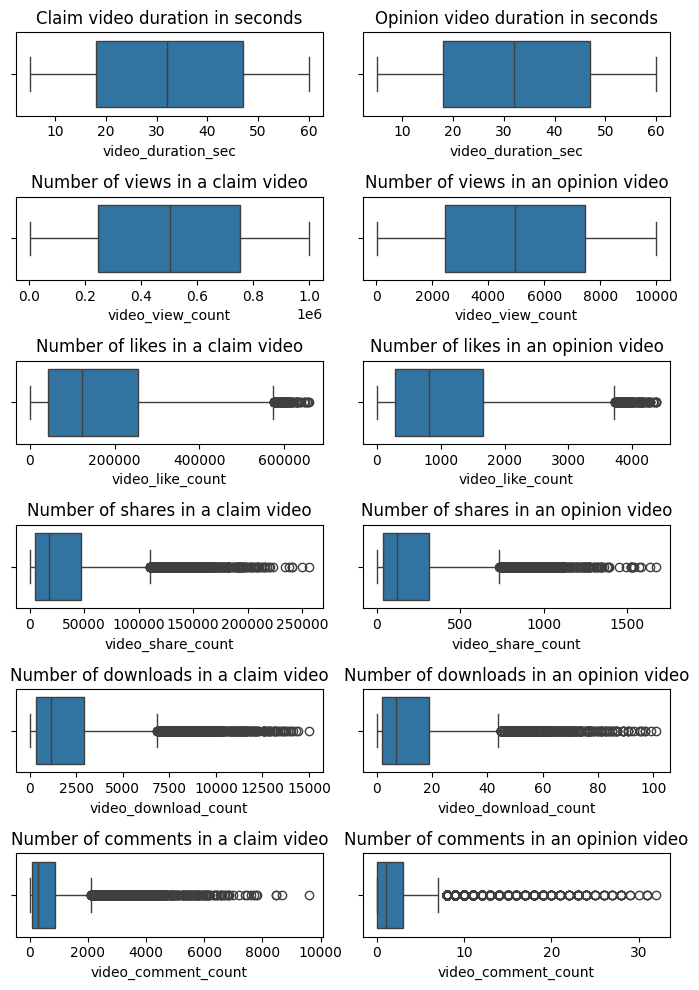

In [16]:
### YOUR CODE HERE ###
fig, axes = plt.subplots(6,2, figsize=(7, 10))

# Boxplots for video duration in seconds for claim and opinion videos
sns.boxplot(data=claim_data, x='video_duration_sec', showfliers=True, ax=axes[0,0])
axes[0,0].set_title('Claim video duration in seconds')

sns.boxplot(data=opinion_data, x='video_duration_sec', showfliers=True, ax=axes[0,1])
axes[0,1].set_title('Opinion video duration in seconds')

# Boxplots for number of views for claim and opinion videos
sns.boxplot(data=claim_data, x='video_view_count', showfliers=True, ax=axes[1,0])
axes[1,0].set_title('Number of views in a claim video')

sns.boxplot(data=opinion_data, x='video_view_count', showfliers=True, ax=axes[1,1])
axes[1,1].set_title('Number of views in an opinion video')

# Boxplots for number of likes for claim and opinion videos
sns.boxplot(data=claim_data, x='video_like_count', showfliers=True, ax=axes[2,0])
axes[2,0].set_title('Number of likes in a claim video')

sns.boxplot(data=opinion_data, x='video_like_count', showfliers=True, ax=axes[2,1])
axes[2,1].set_title('Number of likes in an opinion video')

# Boxplots for number of shares for claim and opinion videos
sns.boxplot(data=claim_data, x='video_share_count', showfliers=True, ax=axes[3,0])
axes[3,0].set_title('Number of shares in a claim video')

sns.boxplot(data=opinion_data, x='video_share_count', showfliers=True, ax=axes[3,1])
axes[3,1].set_title('Number of shares in an opinion video')

# Boxplots for number of downloads for claim and opinion videos
sns.boxplot(data=claim_data, x='video_download_count', showfliers=True, ax=axes[4,0])
axes[4,0].set_title('Number of downloads in a claim video')

sns.boxplot(data=opinion_data, x='video_download_count', showfliers=True, ax=axes[4,1])
axes[4,1].set_title('Number of downloads in an opinion video')

# Boxplots for number of comments for claim and opinion videos
sns.boxplot(data=claim_data, x='video_comment_count', showfliers=True, ax=axes[5,0])
axes[5,0].set_title('Number of comments in a claim video')

sns.boxplot(data=opinion_data, x='video_comment_count', showfliers=True, ax=axes[5,1])
axes[5,1].set_title('Number of comments in an opinion video')

plt.tight_layout()

# CREAR UNA FUNCIÓN PARA ESCRIBIR ESTO DE MANERA MÁS SUCINTA

<span style="color:red">**Observations:**</span> Those boxplots show us the variables with outliers are all engagement metrics but number of views.

<Axes: xlabel='video_duration_sec', ylabel='Count'>

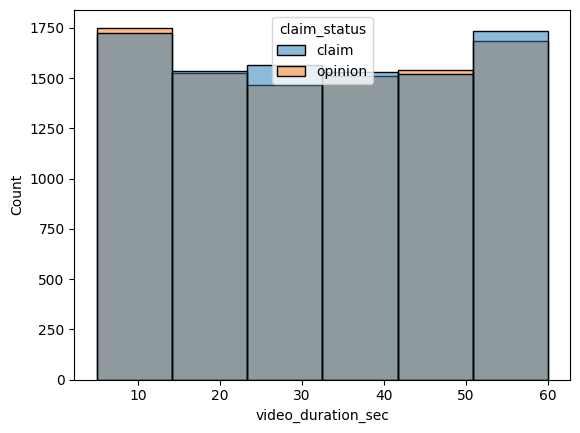

In [17]:
sns.histplot(data=data, x='video_duration_sec', hue='claim_status', bins=6)

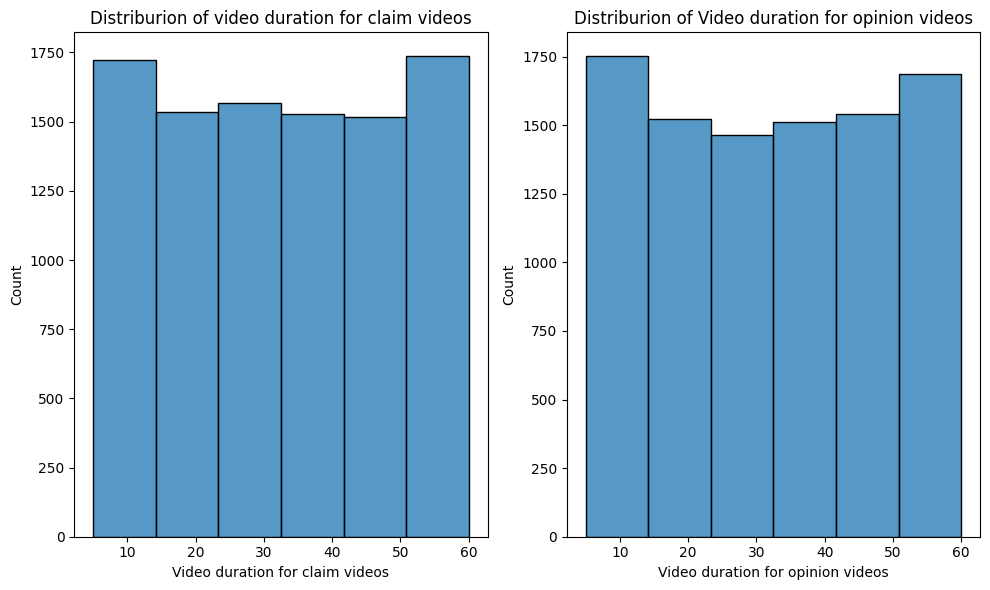

In [18]:
# Visualize the distribution of video duration for claims and opinions
# Create two histograms in one plot
### YOUR CODE HERE ###
claim_duration_text = data[data['claim_status']=='claim']['video_duration_sec']
opinion_duration_text = data[data['claim_status']=='opinion']['video_duration_sec']

fig, (axes0, axes1) = plt.subplots(1, 2, figsize=(10,6))

sns.histplot(claim_duration_text, bins=6, ax=axes0)
axes0.set_xlabel('Video duration for claim videos')
axes0.set_title('Distriburion of video duration for claim videos')

sns.histplot(opinion_duration_text, bins=6, ax=axes1)
axes1.set_xlabel('Video duration for opinion videos')
axes1.set_title('Distriburion of Video duration for opinion videos')

plt.tight_layout()

Check class balance.

In [19]:
# Check class balance
### YOUR CODE HERE ###
data['claim_status'].value_counts(normalize=True)

claim_status
claim      0.503458
opinion    0.496542
Name: proportion, dtype: float64

<span style="color:red">**Observations:**</span> The target class is very well balanced, it's almost 50/50.

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**
Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3: Feature engineering**

Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [20]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
### YOUR CODE HERE ###
data['transcription_length'] = data['video_transcription_text'].apply(lambda text: len(text))
data['transcription_length']

0         97
1        107
2        137
3        131
4        128
        ... 
19079     65
19080     66
19081     53
19082     80
19083     70
Name: transcription_length, Length: 19084, dtype: int64

Calculate the average text_length for claims and opinions.

In [21]:
# Calculate the average text_length for claims and opinions
### YOUR CODE HERE ###
data[['claim_status', 'transcription_length']].groupby(by='claim_status').mean().reset_index()

,claim_status,transcription_length
0,claim,95.376978
1,opinion,82.722562


<span style="color:red">**Observations:**</span> video transcription length's mean for opinion is 82.72, which is lower than the mean for claims at 95.38.

Visualize the distribution of `text_length` for claims and opinions.

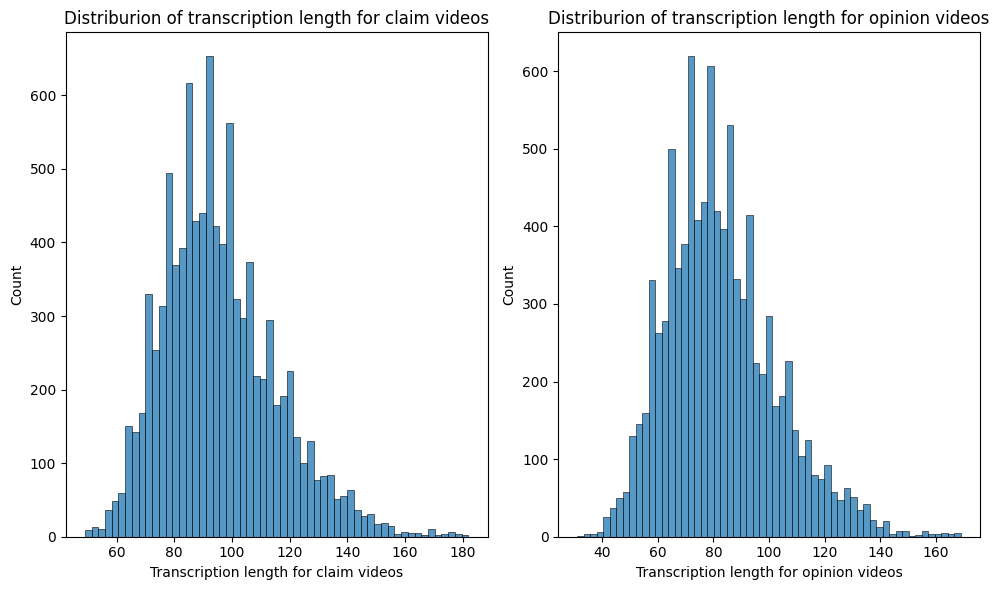

In [22]:
# Visualize the distribution of `text_length` for claims and opinions
# Create two histograms in one plot
### YOUR CODE HERE ###
claim_transcription_text = data[data['claim_status']=='claim']['transcription_length']
opinion_transcription_text = data[data['claim_status']=='opinion']['transcription_length']

fig, (axes0, axes1) = plt.subplots(1, 2, figsize=(10,6))

sns.histplot(claim_transcription_text, ax=axes0)
axes0.set_xlabel('Transcription length for claim videos')
axes0.set_title('Distriburion of transcription length for claim videos')

sns.histplot(opinion_transcription_text, ax=axes1)
axes1.set_xlabel('Transcription length for opinion videos')
axes1.set_title('Distriburion of transcription length for opinion videos')

plt.tight_layout()

In [23]:
claim_data[['author_ban_status']].value_counts(normalize=True)

author_ban_status
active               0.683389
under review         0.166840
banned               0.149771
Name: proportion, dtype: float64

In [24]:
opinion_data[['author_ban_status']].value_counts(normalize=True)

author_ban_status
active               0.930456
under review         0.048860
banned               0.020684
Name: proportion, dtype: float64

In [25]:
claim_data[['verified_status']].value_counts(normalize=True)

verified_status
not verified       0.978247
verified           0.021753
Name: proportion, dtype: float64

In [26]:
opinion_data[['verified_status']].value_counts(normalize=True)

verified_status
not verified       0.89542
verified           0.10458
Name: proportion, dtype: float64

<span style="color:red">**Observations:**</span> 

### **Task 4: Feature selection,  transformation and split the data**

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19084 entries, 0 to 19083
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19084 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19084 non-null  int64  
 3   video_duration_sec        19084 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19084 non-null  object 
 6   author_ban_status         19084 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
 12  transcription_length      19084 non-null  int64  
dtypes: float64(5), int64(4), object(4)
memory usage: 2.0+ MB


In [28]:
# Create a copy of the X data
### YOUR CODE HERE ###
X_df = data.drop(['#', 'video_id', 'video_duration_sec', 'claim_status'], axis=1)
X = X_df.copy()

# Drop unnecessary columns
### YOUR CODE HERE ###
#done above

# Create a copy of the y data
### YOUR CODE HERE ###
y_df = data[['claim_status']]
y = y_df.copy()

In [29]:
# Dummy encode remaining categorical values
### YOUR CODE HERE ###
X = pd.get_dummies(X, columns=['verified_status', 'author_ban_status'], drop_first=True)

In [30]:
# Encode target variable
### YOUR CODE HERE ###
y = pd.get_dummies(y)
y = y.drop('claim_status_opinion', axis=1)

In [31]:
X.head()

,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcription_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


In [32]:
y.head()

,claim_status_claim
0,True
1,True
2,True
3,True
4,True


#### **Task 5: Create train/validate/test sets**

Split data into training and testing sets, 80/20.

In [33]:
# Split the data into training and testing sets
### YOUR CODE HERE ###
X_train, X_tst, y_train, y_tst = train_test_split(X, y, test_size=0.4, random_state=0)

In [34]:
X_train.shape, X_tst.shape, y_train.shape, y_tst.shape

((11450, 10), (7634, 10), (11450, 1), (7634, 1))

Split the test set into validation and test sets, 75/25, to result in a final ratio of 60/20/20 for train/validate/test sets.

In [35]:
# Split the training data into training and validation sets
### YOUR CODE HERE ###
X_val, X_test, y_val, y_test = train_test_split(X_tst, y_tst, test_size=0.5, random_state=0)

Confirm that the dimensions of the training, validation, and testing sets are in alignment.

In [36]:
# Get shape of each training, validation, and testing set
### YOUR CODE HERE ###
X_val.shape, X_test.shape, y_val.shape, y_test.shape

((3817, 10), (3817, 10), (3817, 1), (3817, 1))

### **Adding new features from video transcription**

#### **Training set**

In [37]:
# Set up a `CountVectorizer` object, which converts a collection of text to a matrix of token counts
count_vec = CountVectorizer(ngram_range=(2,3), max_features=15, stop_words='english')

In [38]:
# Extract numerical features from `video_transcription_text` in the data set
count_data_train = count_vec.fit_transform(X_train['video_transcription_text']).toarray()
count_data_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [39]:
# Place the numerical representation of `video_transcription_text` from the data set into a dataframe
count_df_train = pd.DataFrame(data=count_data_train, columns=count_vec.get_feature_names_out())
count_df_train.head()

,colleague discovered,colleague learned,colleague read,discovered news,discussion board,friend learned,friend read,internet forum,learned media,learned website,media claim,news claim,point view,read media,social media
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
token_tallied = count_df_train.sum().sort_values(ascending=False)
token_tallied

media claim             620
friend read             507
colleague read          470
colleague learned       459
internet forum          453
read media              445
friend learned          442
learned media           432
discussion board        428
social media            416
news claim              365
point view              273
colleague discovered    250
learned website         247
discovered news         244
dtype: int64

In [41]:
token_tallied_percentage = (token_tallied / data.shape[0])*100
token_tallied_percentage.sort_values(ascending=False)

media claim             3.248795
friend read             2.656676
colleague read          2.462796
colleague learned       2.405156
internet forum          2.373716
read media              2.331796
friend learned          2.316076
learned media           2.263676
discussion board        2.242716
social media            2.179837
news claim              1.912597
point view              1.430518
colleague discovered    1.309998
learned website         1.294278
discovered news         1.278558
dtype: float64

In [42]:
# Concatenate `X_train` and `count_df_train` to form the final dataframe for training data.
# Note: Using `.reset_index(drop=True)` to reset the index in X_train after dropping `video_transcription_text`,
# so that the indices align with those in `X_train` and `count_df_train`
X_train = pd.concat([X_train.drop('video_transcription_text', axis=1).reset_index(drop=True), count_df_train], axis=1)
X_train.head()

,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcription_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review,colleague discovered,colleague learned,colleague read,discovered news,discussion board,friend learned,friend read,internet forum,learned media,learned website,media claim,news claim,point view,read media,social media
0,1525.0,228.0,5.0,5.0,1.0,73,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2252.0,723.0,101.0,16.0,3.0,94,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3175.0,440.0,97.0,6.0,1.0,57,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4341.0,608.0,143.0,15.0,1.0,93,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,882.0,100.0,22.0,0.0,0.0,68,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
# Verify shape after adding tokenisation columns
X_train.shape

(11450, 24)

#### **Validation set**

In [44]:
# Do the same for validation set, without refitting, only transforming it.
# Extract numerical features from `video_transcription_text` in the validation set
count_data_val = count_vec.transform(X_val['video_transcription_text']).toarray()

# Place the numerical representation of `video_transcription_text` from validation set into a dataframe
count_df_val = pd.DataFrame(data=count_data_val, columns=count_vec.get_feature_names_out())

# Concatenate `X_val` and `count_df_val` to form the final dataframe for validation data
X_val = pd.concat([X_val.drop(columns=['video_transcription_text']
                                      ).reset_index(drop=True), count_df_val], axis=1)
X_val.head()

,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcription_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review,colleague discovered,colleague learned,colleague read,discovered news,discussion board,friend learned,friend read,internet forum,learned media,learned website,media claim,news claim,point view,read media,social media
0,715767.0,139365.0,10827.0,456.0,2.0,86,False,False,False,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,899714.0,463490.0,154485.0,2250.0,565.0,70,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8148.0,1548.0,450.0,25.0,8.0,63,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,694905.0,313112.0,72530.0,2868.0,804.0,69,False,False,False,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,986457.0,158625.0,19343.0,1537.0,363.0,70,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### **Test set**

In [45]:
# Do the same for test set, without refitting, only transforming it.
# Extract numerical features from `video_transcription_text` in the test set
count_data_test = count_vec.transform(X_test['video_transcription_text']).toarray()

# Place the numerical representation of `video_transcription_text` from test set into a dataframe
count_df_test = pd.DataFrame(data=count_data_test, columns=count_vec.get_feature_names_out())

# Concatenate `X_test` and `count_df_test` to form the final dataframe for test data
X_test = pd.concat([X_test.drop(columns=['video_transcription_text']
                                      ).reset_index(drop=True), count_df_test], axis=1)
X_test.head()

,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcription_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review,colleague discovered,colleague learned,colleague read,discovered news,discussion board,friend learned,friend read,internet forum,learned media,learned website,media claim,news claim,point view,read media,social media
0,5608.0,454.0,172.0,4.0,0.0,118,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3017.0,559.0,99.0,1.0,0.0,82,True,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4948.0,163.0,62.0,1.0,0.0,85,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3203.0,227.0,69.0,4.0,1.0,57,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,514226.0,225275.0,50504.0,654.0,41.0,87,False,False,False,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


### **Task 6. Build models**


### **Build a random forest model**

Fit a random forest model to the training set. Use cross-validation to tune the hyperparameters and select the model that performs best on recall.

In [ ]:
# Instantiate the random forest classifier
### YOUR CODE HERE ###
rf = RandomForestClassifier(random_state=0)

# Create a dictionary of hyperparameters to tune
### YOUR CODE HERE ###
cv_params = {'max_depth': [2, 4, 7, 9, None],
             'max_features': [2, 3, 4, 8, 10, 20],
             'min_samples_leaf': [1, 2, 3],
             'min_samples_split': [2, 3, 4],
             'n_estimators': [75, 100, 125, 150]
            }

# Define a list of scoring metrics to capture
### YOUR CODE HERE ###
scoring = {
    'accuracy': 'accuracy', 
    'precision': 'precision', 
    'recall': 'recall', 
    'f1': 'f1'
}

# Instantiate the GridSearchCV object
### YOUR CODE HERE ###
rf_cv = GridSearchCV(rf,
                    cv_params,
                    scoring=scoring,
                    cv=5,
                    refit='recall'
                    )

In [47]:
%%time

### Fit the model to the data 
### YOUR CODE HERE ###
rf_cv.fit(X_train, y_train)

CPU times: user 1h 20min 8s, sys: 10.7 s, total: 1h 20min 19s
Wall time: 1h 20min 20s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [2, 4, 7, 9, None],
                         'max_features': [2, 3, 4, 8, 10, 20],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [75, 100, 125, 150]},
             refit='recall',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [48]:
def model_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.

    Returns a pandas df with the recall, precision, f1 and accuracy scores
    for the model with the best mean recall score across all validation folds.  
    '''
    
    # Get all the results from the CV and put them in a df    
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = cv_results['mean_test_f1'][model_object.best_index_]
    recall = cv_results['mean_test_recall'][model_object.best_index_]
    precision = cv_results['mean_test_precision'][model_object.best_index_]
    accuracy = cv_results['mean_test_accuracy'][model_object.best_index_]
    
    # Create table of results
    table = pd.DataFrame({'Model' : [model_name],
                        'Recall' : [recall],
                        'Precision' : [precision],
                        'Accuracy' : [accuracy],
                        'F1': [f1]  
                        }
                        )
    return (table, cv_results)

In [146]:
final_table = model_results('Random Forest', rf_cv)[0]
final_table

,Model,Recall,Precision,Accuracy,F1
0,Random Forest,0.995539,0.999827,0.997642,0.997678


In [ ]:
(model_results('Random Forest', rf_cv)[1]).to_csv('rf_cv_df.csv')

In [51]:
rf_cv_df = pd.read_csv('rf_cv_df.csv')

In [52]:
#Use pickle:
# Define a path to the folder where you want to save the model
path = '/home/jovyan/work/'

In [53]:
# Pickle the model
with open(path + 'rf_cv_model.pickle', 'wb') as to_write:
    pkl.dump(rf_cv, to_write)

In [54]:
# Read in pickled model
with open(path + 'rf_cv_model.pickle', 'rb') as to_read:
    rf_cv = pkl.load(to_read)

In [55]:
# Examine best parameters
### YOUR CODE HERE ###
rf_cv.best_params_

{'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 75}

In [56]:
rf_cv.best_score_

0.9955388364166403

Check the precision score to make sure the model isn't labeling everything as claims. You can do this by using the `cv_results_` attribute of the fit `GridSearchCV` object, which returns a numpy array that can be converted to a pandas dataframe. Then, examine the `mean_test_precision` column of this dataframe at the index containing the results from the best model. This index can be accessed by using the `best_index_` attribute of the fit `GridSearchCV` object.

In [57]:
# Access the GridSearch results and convert it to a pandas df
### YOUR CODE HERE ###
cv_results_table = pd.DataFrame(rf_cv.cv_results_)

# Examine the GridSearch results df at column `mean_test_precision` in the best index
### YOUR CODE HERE ###
cv_results_table['mean_test_precision'][rf_cv.best_index_]

0.9998274374460742

**Question:** How well is your model performing? Consider average recall score and precision score.

### **Build an XGBoost model**

In [115]:
# Instantiate the XGBoost classifier
### YOUR CODE HERE ###
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Create a dictionary of hyperparameters to tune
### YOUR CODE HERE ###
xgb_cv_params = {'max_depth' : [10, 14, 20],
                 'colsample_bytree' : [0.9, 1],
                 'subsample' : [0.9, 1],
                 'min_child_weight' : [0.5, 0.7, 1.0],
                 'learning_rate' : [0.1, 0.2, 0.3],
                 'n_estimators' : [50, 100, 150]
                }

# Define a list of scoring metrics to capture
### YOUR CODE HERE ###
scoring = {'recall': 'recall',
    'accuracy': 'accuracy', 
    'precision': 'precision',  
    'f1': 'f1'
    }

# Instantiate the GridSearchCV object
### YOUR CODE HERE ###
xgb_cv = GridSearchCV(xgb, xgb_cv_params, scoring=scoring, cv=5, refit='recall')

In [116]:
%%time

# Fit the model to the data
### YOUR CODE HERE ###
xgb_cv.fit(X_train, y_train)

CPU times: user 7min 42s, sys: 6.67 s, total: 7min 48s
Wall time: 4min 22s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'colsample_bytree': [0.9, 1],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [10, 14, 20],
                         'min_child_weight': [0.5, 0.7, 1.0],
                         'n_estimators': [50, 100, 150],
                         'subsample': [0.9, 1]},
             refit='recall',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [117]:
xgb_cv.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_weight': 0.5,
 'n_estimators': 50,
 'subsample': 0.9}

In [118]:
# Examine best parameters
### YOUR CODE HERE ###
xgb_cv.best_score_

0.9927929386994899

In [119]:
(model_results('Gradient Boosting', xgb_cv)[1]).to_csv('xgb_cv_df.csv')

In [120]:
xgb_cv_df = pd.read_csv('xgb_cv_df.csv')

In [147]:
temp_table = model_results('Gradient Boosting', xgb_cv)[0]
temp_table

,Model,Recall,Precision,Accuracy,F1
0,Gradient Boosting,0.992793,0.999484,0.99607,0.996124


In [148]:
temp_table.to_csv('results_table.csv', index=False)

In [149]:
results_table = pd.read_csv('results_table.csv', index_col=False)
results_table

,Model,Recall,Precision,Accuracy,F1
0,Gradient Boosting,0.992793,0.999484,0.99607,0.996124


In [129]:
final_table = pd.concat([results_table, final_table]).sort_values(by='Recall', ascending=False)
final_table

,Model,Recall,Precision,Accuracy,F1
0,Random Forest,0.995539,0.999827,0.997642,0.997678
0,Gradient Boosting,0.992793,0.999484,0.996070,0.996124


In [150]:
final_table.to_csv('final_table.csv', index=False)

Repeat the steps used for random forest to examine the precision score of the best model identified in the grid search.

In [126]:
# Access the GridSearch results and convert it to a pandas df
### YOUR CODE HERE ###

# Examine the GridSearch results df at column `mean_test_precision` in the best index
### YOUR CODE HERE ###
xgb_cv_df['mean_test_precision'][xgb_cv.best_index_]

0.9994839435952126

**Question:** How well does your model perform? Consider recall score and precision score.

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**
Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 7. Evaluate model**

Evaluate models against validation criteria.

#### **Random forest**

In [71]:
rf_cv.best_params_

{'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 75}

In [72]:
# Use the random forest "best estimator" model to get predictions on the validation set
rf_cv.best_estimator_

RandomForestClassifier(max_features=3, n_estimators=75, random_state=0)

In [73]:
rf_optimal = RandomForestClassifier(max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=75, random_state=0)

In [74]:
rf_optimal.fit(X_train, y_train)

RandomForestClassifier(max_features=3, n_estimators=75, random_state=0)

In [75]:
y_pred = rf_optimal.predict(X_val)

In [76]:
precision_score(y_val, y_pred)

0.9994786235662148

In [77]:
recall_score(y_val, y_pred)

0.9979177511712649

In [78]:
accuracy_score(y_val, y_pred)

0.9986900707361802

In [79]:
f1_score(y_val, y_pred)

0.9986975774941391

Display the predictions on the validation set.

In [80]:
# Display the predictions on the validation set
### YOUR CODE HERE ###
y_pred

array([ True,  True, False, ...,  True,  True, False])

Display the true labels of the validation set.

In [81]:
# Display the true labels of the validation set
### YOUR CODE HERE ###
y_val

,claim_status_claim
4025,True
952,True
13620,False
2788,True
7580,True
...,...
6856,True
8851,True
6723,True
4857,True


Create a confusion matrix to visualize the results of the classification model.

Text(0.5, 1.0, 'Random Forest with tokenisation')

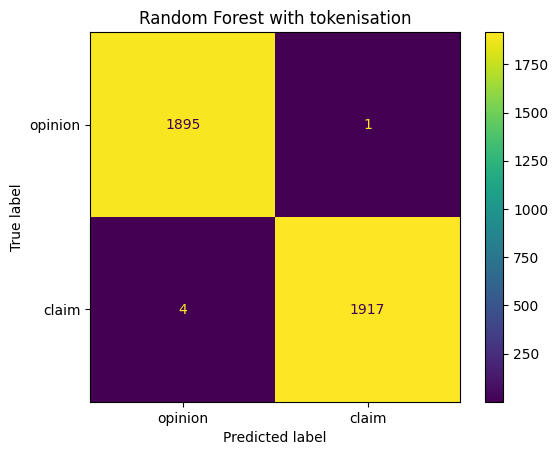

In [85]:
# Create a confusion matrix to visualize the results of the classification model
#plt.figure(figsize=(3,3))
# Compute values for confusion matrix
### YOUR CODE HERE ###
cm = confusion_matrix(y_val, y_pred, labels=rf_optimal.classes_)

# Create display of confusion matrix using ConfusionMatrixDisplay()
### YOUR CODE HERE ###
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['opinion', 'claim'])

# Plot confusion matrix
### YOUR CODE HERE ###
disp.plot()
plt.title('Random Forest with tokenisation')

# Display plot
### YOUR CODE HERE ###

In [83]:
# Create a classification report
# Create classification report for random forest model
### YOUR CODE HERE ###
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1896
        True       1.00      1.00      1.00      1921

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



#### **XGBoost**

Now, evaluate the XGBoost model on the validation set.

In [130]:
# Use the best estimator to predict on the validation data
### YOUR CODE HERE ###
xgb_cv.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=0.5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [131]:
xgb_cv.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_weight': 0.5,
 'n_estimators': 50,
 'subsample': 0.9}

In [132]:
xgb_optimal = XGBClassifier(colsample_bytree=0.9, learning_rate=0.1, max_depth=10, min_child_weight=0.5, n_estimators=50,
 subsample=0.9, random_state=0)

In [133]:
xgb_optimal.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=0.5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [134]:
y_xgb_pred = xgb_optimal.predict(X_val)

In [135]:
recall_score(y_val, y_xgb_pred)

0.9932326913066112

In [136]:
precision_score(y_val, y_xgb_pred)

1.0

In [137]:
accuracy_score(y_val, y_xgb_pred)

0.9965941839140686

In [138]:
f1_score(y_val, y_xgb_pred)

0.9966048576651868

Text(0.5, 1.0, 'Gradient Boosting with tokenisation')

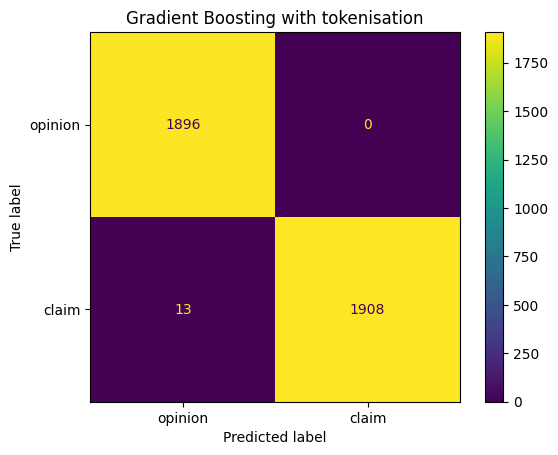

In [139]:
# Compute values for confusion matrix
### YOUR CODE HERE ###
cm_xgb = confusion_matrix(y_val, y_xgb_pred, labels=xgb_optimal.classes_)

# Create display of confusion matrix using ConfusionMatrixDisplay()
### YOUR CODE HERE ###
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['opinion', 'claim'])
# Plot confusion matrix
### YOUR CODE HERE ###
disp_xgb.plot()
plt.title('Gradient Boosting with tokenisation')
# Display plot
### YOUR CODE HERE ###


In [140]:
# Create a classification report of the Gradient boosting model
### YOUR CODE HERE ###
print(classification_report(y_val, y_xgb_pred))

              precision    recall  f1-score   support

       False       0.99      1.00      1.00      1896
        True       1.00      0.99      1.00      1921

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



**Question:** Describe your XGBoost model results. How does your XGBoost model compare to your random forest model?

### **Use champion model to predict on test data**

In [161]:
X_final = pd.concat([X_train, X_val])
X_final.shape

(15267, 24)

In [162]:
y_final = pd.concat([y_train, y_val])
y_final.shape

(15267, 1)

In [164]:
### YOUR CODE HERE ###
rf_optimal.fit(X_final, y_final)

RandomForestClassifier(max_features=3, n_estimators=75, random_state=0)

In [165]:
y_final_pred = rf_optimal.predict(X_test)

Text(0.5, 1.0, 'Champion model: Random Forest with tokenisation')

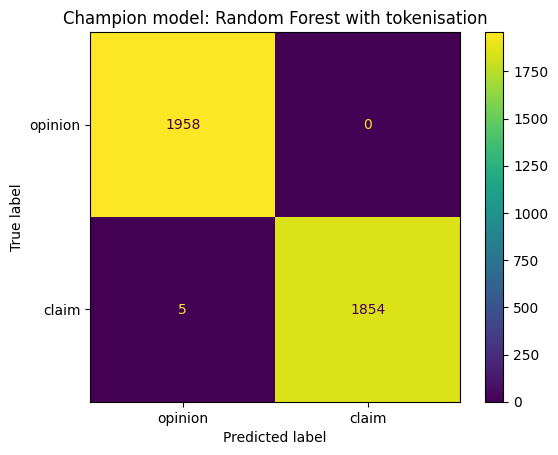

In [166]:
# Compute values for confusion matrix
### YOUR CODE HERE ###
cm_champion = confusion_matrix(y_test, y_final_pred, labels=rf_optimal.classes_)

# Create display of confusion matrix using ConfusionMatrixDisplay()
### YOUR CODE HERE ###
disp_champion = ConfusionMatrixDisplay(confusion_matrix=cm_champion, display_labels=['opinion', 'claim'])

# Plot confusion matrix
### YOUR CODE HERE ###
disp_champion.plot()
plt.title('Champion model: Random Forest with tokenisation')
# Display plot
### YOUR CODE HERE ###


In [168]:
# Create a classification report of the Gradient boosting model
### YOUR CODE HERE ###
print(classification_report(y_test, y_final_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1958
        True       1.00      1.00      1.00      1859

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



In [170]:
recall_score(y_test, y_final_pred)

0.9973103819257665

In [171]:
precision_score(y_test, y_final_pred)

1.0

In [172]:
accuracy_score(y_test, y_final_pred)

0.9986900707361802

In [173]:
f1_score(y_test, y_final_pred)

0.9986533800161594

#### **Feature importances of champion model**


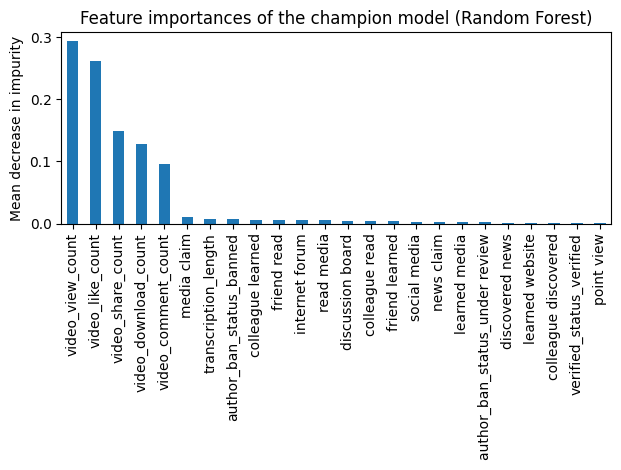

In [174]:
### YOUR CODE HERE ###
importances = rf_cv.best_estimator_.feature_importances_

rf_importances = pd.Series(importances, index=X_final.columns).sort_values(ascending=False)

fig, ax = plt.subplots()

rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances of the champion model (Random Forest)')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

**Question:** Describe your most predictive features. Were your results surprising?

### **Task 8. Conclusion**

In this step use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**
I would definitely recommend this model. It was able to correctly predict over 99% of claim videos across the training, validation, and test sets. Its precision score consistently exceeded 99%, misclassifying at most only 5 claim videos out of a total of 3,817. This will significantly reduce the backlog of user reports and allow for more efficient prioritization.

2. **What was your model doing? Can you explain how it was making predictions?**

The model classified opinion and claim videos primarily based on engagement metrics such as the number of views, likes, shares, downloads, and comments. These were the most influential variables for predicting claim status.

As I mentioned earlier, the percentage of claim videos correctly classified was over 99% in both the known data (training set) and the new data (validation and test sets). The other metrics—precision, accuracy, and F1 score—also exceeded 99%. In particular, the precision score on the test set was perfect, meaning all opinion videos were correctly classified.

3. **Are there new features that you can engineer that might improve model performance?**

After an initial round of tweaking both the Random Forest and Boosting models, I did some additional feature engineering using key word pairs from the transcription text. This made the predictions nearly perfect. I believe this is sufficient, as the results clearly support it.

4. **What features would you want to have that would likely improve the performance of your model?**

As I mentioned earlier, extracting key expressions from the video transcriptions was a feature I hadn’t included at first. However, after adding them, both models achieved near-perfect results.


**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.